## Sarsa (lambda) algorithm
Mixture of TD and Monte Carlo,  This is called Sarsa Lambda. 

The Sarsa lambda is an **off-policy control** method that uses
**S,A = R + S',A'** to get the optimal action value **Q(S,A).**

As stated before Off policy iss...
##### Policy Explanation
- **Target policy:** a policy that is learned about and that becomes the optimal policy
- **Behaviour policy** : a policy that is more exploratory and is used to generate behaviour. Much like epsilon greedy

So what does **on-policy** and **off-policy** mean?
- **on-policy** : a policy using **target policy** only.
- **off-policy**: Using both **target-policy** and **behaviour-policy**. 


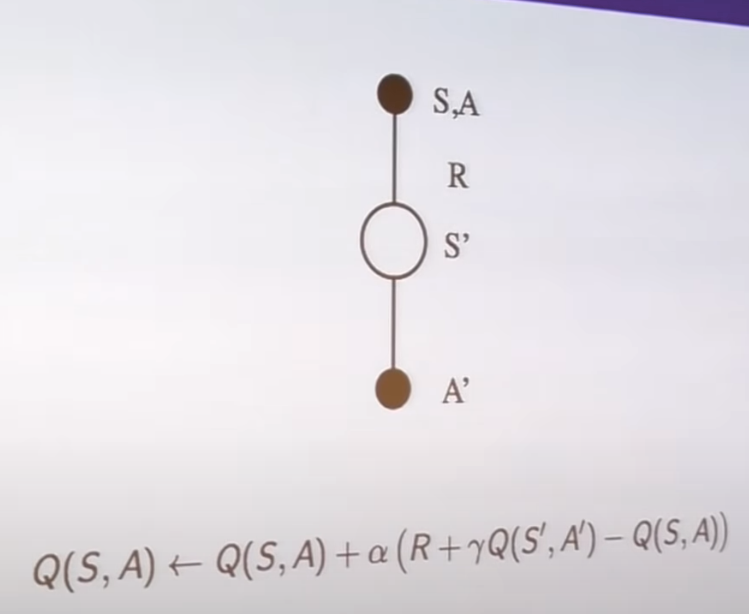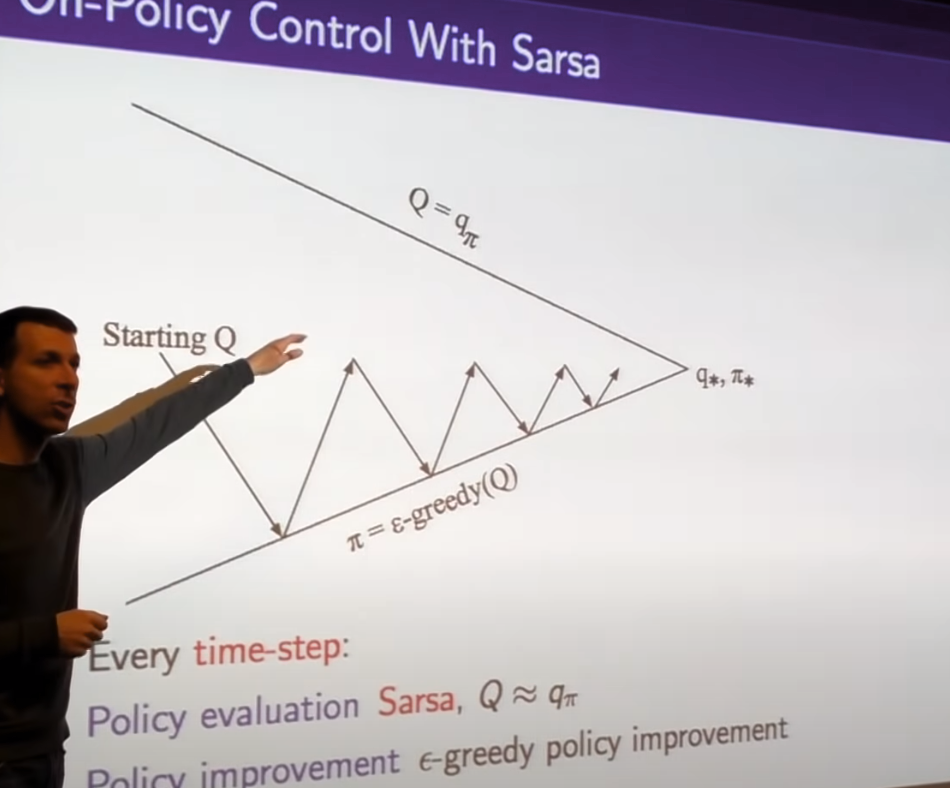

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = "serif"
import copy
import random
from gridworld import *

### Behavior policy and Target policy
We'll be using **e-greedy** as our *behavior policy* and input the *target policy* **arg_max inside** the behaviour policy.

### Decaying epsilon greedy
Below we will use the function **update_episilon** to decay following **each episode/game_over**. As the number of episodes increase, we slowly decay according to policy.
This is also known as Decaying epsilon greedy method. Since at the first episode we want the robot to explore the world, but as more and more episodes are done, we want the robots to stop choosing random actions and start being certain about it's own decisions aka following the *target_policy*.

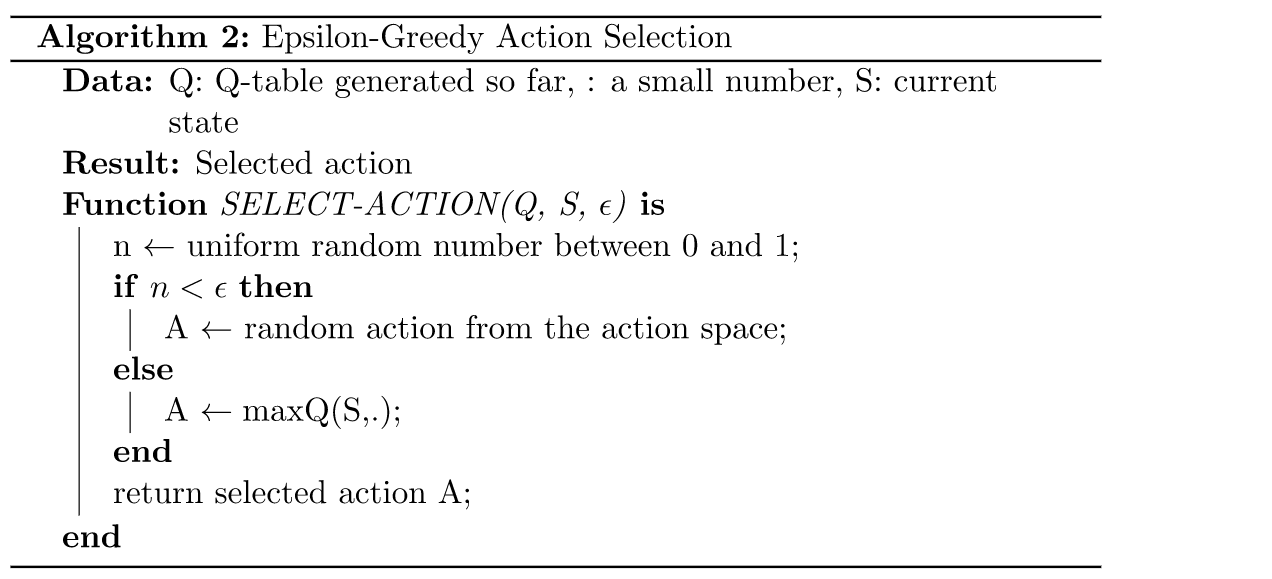

In [2]:
# Behaviour policy using target policy will be specified below
# e-greedy function
def action_e_greedy_policy(q_values, epsilon, target_policy):
    """ e-greedy policy """
    if random.random() < epsilon: # rand(0,1)
        action = random.randint(0,3)
    else:
        action = target_policy(q_values)
    return action

# Epsilon Decay!!!
def update_episilon(current_episode, max_episodes,initial_e=1.0, final_e=0.0):
    r = max((max_episodes-current_episode)/max_episodes,0)
    e = (initial_e-final_e)*r + final_e
    #print(e)
    return e

In [3]:
# init the environment:
max_episodes = 5000
env = Gridworld(step_cost=-0.1,max_ep_length=30)

action_value_grid = np.zeros((12,4))
action_value_grid[3] = 1 # Goal 
action_value_grid[7] = -1 # Death
g = 0.99 # discounting factor
alpha = 0.01 # learning rate
lambda1 = 1
epsilon = 0.99

In [4]:
target_policy = lambda q: np.argmax(q) # target policy - argmax policy
# Behaviour policy - epsilon_greedy with the target policy
behavior_policy = lambda q_values, epsilon : action_e_greedy_policy(q_values, epsilon, target_policy) 

#### Eligibility Trace
The difference between Sarsa in TD0.ipynb and Sarsa lambda is the **eligibility trace**.

It is used to get the **Forward view** much like a Monte carlo or TD lambda. with the backward view of TD. It essentially holds all information that has been done in that current episode. Hence, if episode ends/game_over, we have to reinitialize it. There are 2 methods to update the eligibility. 
- Method 1: Add +1 on the Eligibility of the trace.
- Method 2: Use a normalization of 1 for the eligibility trace. The reason we want to do method 2 rather than method 1 is because with infinite number of iterations, the accumulating trace will go much higher . Though never more than 1 but it wont give the best result

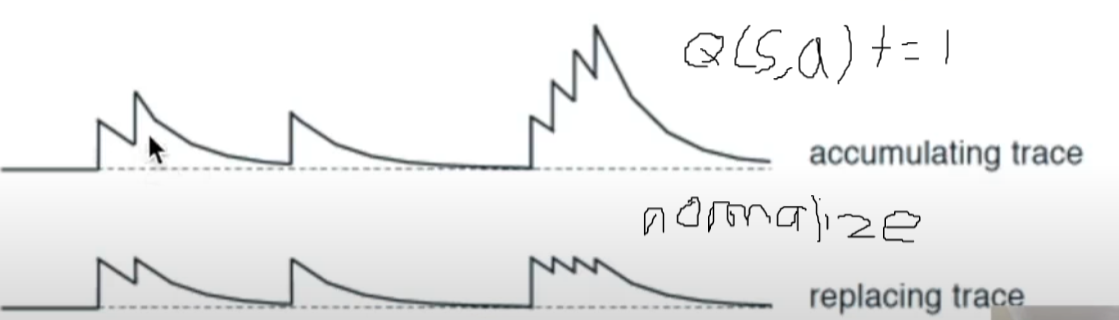

#### Sarsa Lambda Algorithm for reference
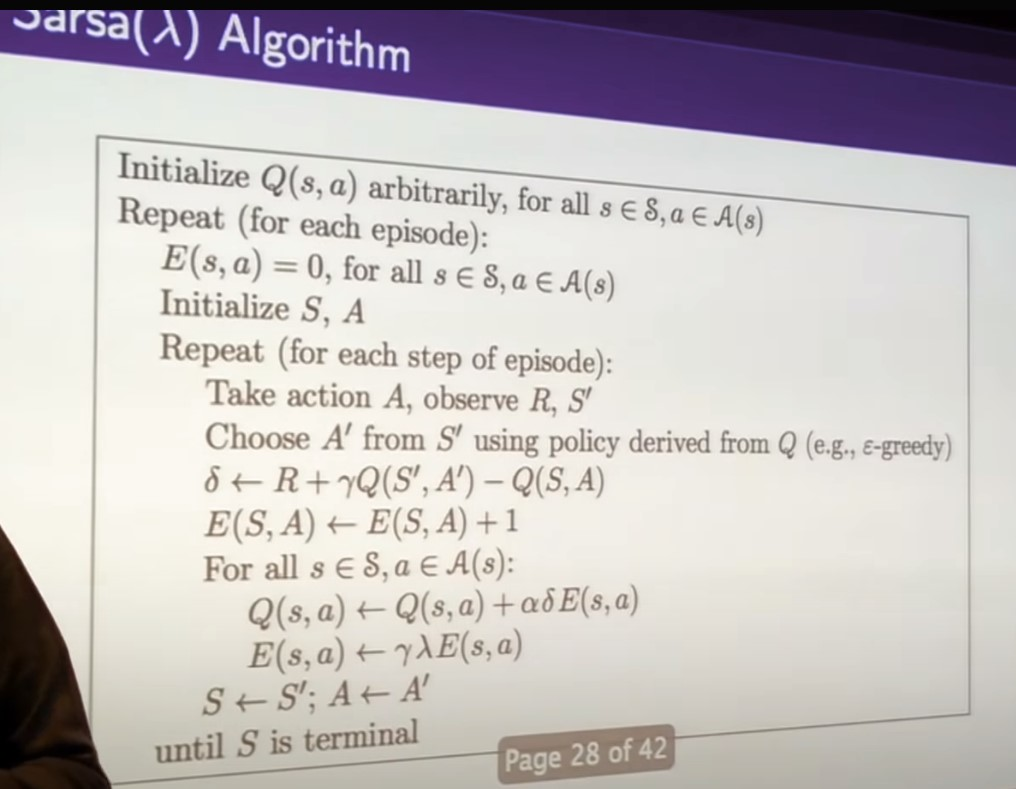

0.0002


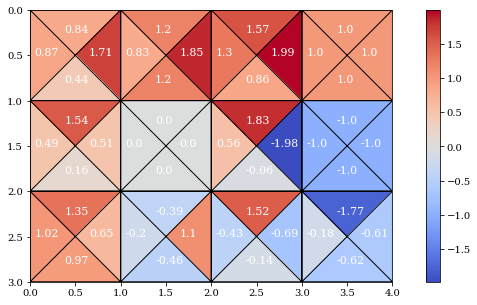

In [5]:
# Running Sarsa Lambda    
for ep in range(max_episodes):
    epsilon = update_episilon(current_episode=ep,max_episodes=max_episodes)
    if ep == max_episodes-1:print(epsilon)

    # S,A
    state = env.reset()
    action = behavior_policy(action_value_grid[state], 1)
    eligibility = np.zeros((12,4))
    while True:     
        # S',R
        next_state, reward, done = env.step(action)
        # Updating
        # A'
        next_action = behavior_policy(action_value_grid[next_state], epsilon)
        
        delta = reward+ (g*action_value_grid[next_state][next_action]) - action_value_grid[state][action]
        
        # Method 1
        # eligibility[state, action] +=1
        
        # Method 2
        eligibility[state,:] *=0
        eligibility[state,action] +=1
        
        # SARSA
        # SA = R+S'A
        # Q(S,A) = Q(S,A) + alpha[R + yQ(S',A') - Q(S,A)]
        #action_value_grid[state][action] += alpha*(reward + g*action_value_grid[next_state][next_action] - action_value_grid[state][action])
        action_value_grid[state][action] += alpha*delta*eligibility[state][action]
        eligibility[state][action] *= g*lambda1
        
        
        # S, A
        state = next_state
        action = next_action
        if done:
            break
plot_action_value(action_value_grid)